# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Find Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
   
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json))

{"coord": {"lon": 107.6, "lat": 16.4667}, "weather": [{"id": 701, "main": "Mist", "description": "mist", "icon": "50d"}], "base": "stations", "main": {"temp": 78.91, "feels_like": 78.91, "temp_min": 78.91, "temp_max": 78.91, "pressure": 1017, "humidity": 94}, "visibility": 4000, "wind": {"speed": 9.22, "deg": 300}, "clouds": {"all": 75}, "dt": 1635474884, "sys": {"type": 1, "id": 9310, "country": "VN", "sunrise": 1635461150, "sunset": 1635502837}, "timezone": 25200, "id": 1580240, "name": "Hue", "cod": 200}


In [4]:
city_name = []
country = []
date = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []

record_count = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------")
    
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        city_name2 = response["name"]
        print(f"Processing Record {record_count} : {city_name2}")    
        
        record_count += 1
    except:
        print("City not found. Skipping...") 
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 : Butaritari
Processing Record 2 : Mashhad
City not found. Skipping...
Processing Record 3 : Ushuaia
Processing Record 4 : Sur
Processing Record 5 : Busselton
Processing Record 6 : Darhan
Processing Record 7 : Ponta do Sol
Processing Record 8 : Champerico
Processing Record 9 : Tottori-shi
Processing Record 10 : Mahébourg
Processing Record 11 : Port Alfred
Processing Record 12 : Muroto-misakicho
Processing Record 13 : Listvyagi
Processing Record 14 : Lagoa
Processing Record 15 : Pevek
Processing Record 16 : Melfi
Processing Record 17 : Carnarvon
Processing Record 18 : Vestmannaeyjar
Processing Record 19 : Karratha
Processing Record 20 : Jamestown
Processing Record 21 : Punta Arenas
Processing Record 22 : Hilo
Processing Record 23 : Caravelas
Processing Record 24 : Mataura
Processing Record 25 : Martapura
Processing Record 26 : Nantucket
Processing Record 27 : Codrington
Processing Record 28 : Ambilobe
Processing Reco

Processing Record 227 : La Santisima Trinidad
Processing Record 228 : Craig
Processing Record 229 : Dale
City not found. Skipping...
Processing Record 230 : Xining
Processing Record 231 : Raduzhny
Processing Record 232 : Te Anau
Processing Record 233 : Nabire
Processing Record 234 : Katangli
Processing Record 235 : Almaznyy
Processing Record 236 : Yarega
Processing Record 237 : Ostrovskoye
Processing Record 238 : Dunedin
Processing Record 239 : Camacha
Processing Record 240 : Bayan
Processing Record 241 : Cururupu
Processing Record 242 : Luba
Processing Record 243 : Al Bardīyah
Processing Record 244 : Yulara
Processing Record 245 : Hong Kong
Processing Record 246 : Mendi
Processing Record 247 : Tuktoyaktuk
Processing Record 248 : Puerto Baquerizo Moreno
City not found. Skipping...
Processing Record 249 : San Juan
Processing Record 250 : Penalva
Processing Record 251 : Meridian
Processing Record 252 : San Bartolomé de Tirajana
Processing Record 253 : Khanbari
Processing Record 254 : Pal

Processing Record 457 : Ereymentau
Processing Record 458 : Yatou
Processing Record 459 : Djibo
Processing Record 460 : Leominster
Processing Record 461 : Owase
Processing Record 462 : Brits
Processing Record 463 : Pangkalanbuun
Processing Record 464 : Ortaköy
Processing Record 465 : Inhambane
Processing Record 466 : Cherskiy
Processing Record 467 : Jumla
City not found. Skipping...
Processing Record 468 : Aklavik
Processing Record 469 : Sal Rei
Processing Record 470 : Hambantota
Processing Record 471 : Keti Bandar
Processing Record 472 : Hīt
Processing Record 473 : Sisimiut
Processing Record 474 : Kuusamo
Processing Record 475 : Chengde
Processing Record 476 : Luboń
Processing Record 477 : Xiaoshi
Processing Record 478 : Katobu
Processing Record 479 : Bournemouth
Processing Record 480 : Clyde River
Processing Record 481 : Zharkent
Processing Record 482 : Chiang Klang
City not found. Skipping...
Processing Record 483 : Matagami
Processing Record 484 : Vanavara
Processing Record 485 : Ta

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_dictionary = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longitude":lon,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed
}
weather_df = pd.DataFrame(weather_dictionary)
weather_df.to_csv("./output_data/weather_data.csv")

In [14]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,1635474647,3.0707,172.7902,82.83,68,1,13.38
1,Mashhad,IR,1635474884,36.2970,59.6062,37.54,81,0,4.61
2,Ushuaia,AR,1635474718,-54.8000,-68.3000,56.86,47,20,11.50
3,Sur,OM,1635474885,22.5667,59.5289,78.24,61,0,1.19
4,Busselton,AU,1635474715,-33.6500,115.3333,60.04,51,54,7.40


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#Skip - no cities with humidity over 100%

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

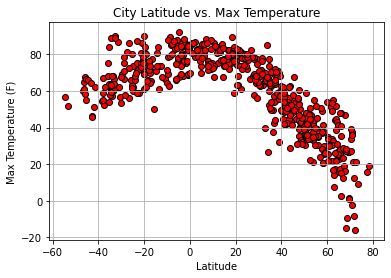

In [25]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temperature"], facecolors="red",marker="o",edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("./output_data/Lat_vs_Max_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

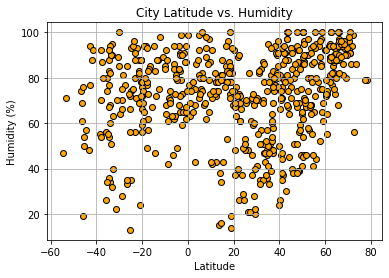

In [24]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"], facecolors="orange",marker="o",edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("./output_data/Lat_vs_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

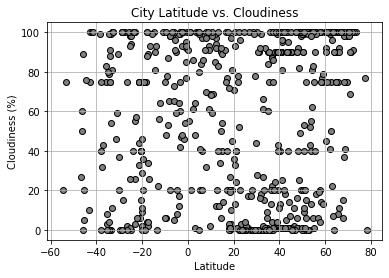

In [31]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], facecolors="grey",marker="o",edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("./output_data/Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

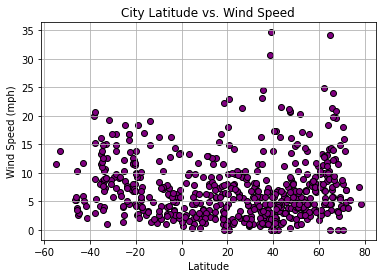

In [32]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], facecolors="purple",marker="o",edgecolor="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("./output_data/Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [36]:
northern = weather_df.loc[weather_df["Latitude"]>=0.0]
northern.reset_index(inplace=True)
southern = weather_df.loc[weather_df["Latitude"]<0.0]
southern.reset_index(inplace=True)
northern.dtypes

index                int64
City                object
Country             object
Date                 int64
Latitude           float64
Longitude          float64
Max Temperature    float64
Humidity             int64
Cloudiness           int64
Wind Speed         float64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8923173616049292


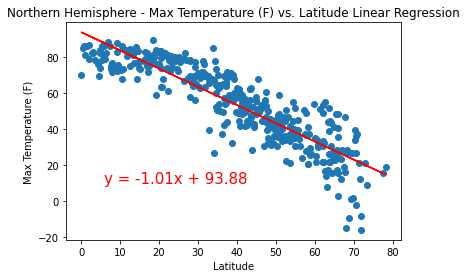

In [53]:
x_values = pd.to_numeric(northern['Latitude'])
y_values = pd.to_numeric(northern['Max Temperature'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/North_Temp_vs_Lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.591510863797317


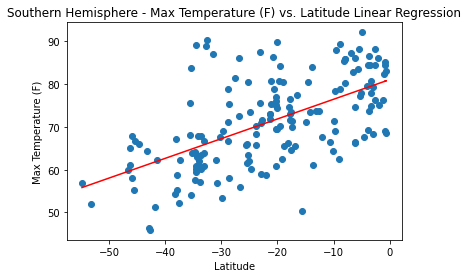

In [54]:
x_values = pd.to_numeric(southern['Latitude'])
y_values = pd.to_numeric(southern['Max Temperature'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/South_Temp_vs_Lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28594120963994796


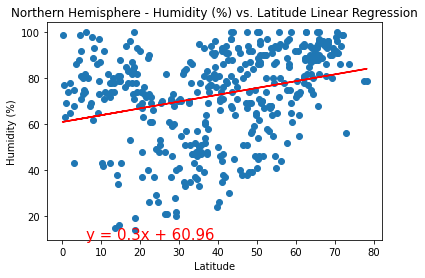

In [58]:
x_values = pd.to_numeric(northern['Latitude'])
y_values = pd.to_numeric(northern['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/North_Humid_vs_Lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23766064932968511


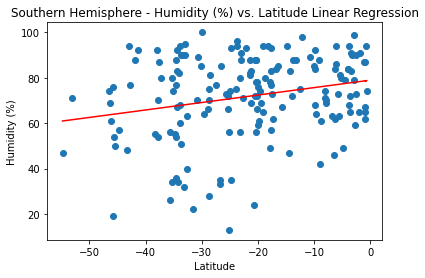

In [59]:
x_values = pd.to_numeric(southern['Latitude'])
y_values = pd.to_numeric(southern['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/South_Humid_vs_Lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19844142568246145


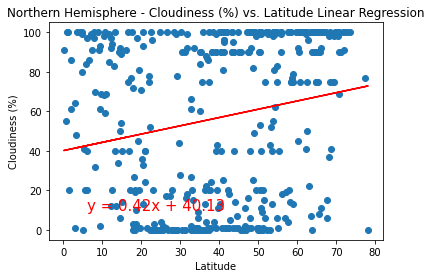

In [60]:
x_values = pd.to_numeric(northern['Latitude'])
y_values = pd.to_numeric(northern['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/North_Cloud_vs_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19261378752214278


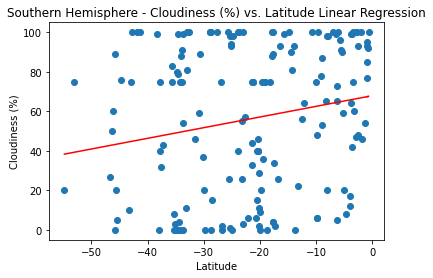

In [63]:
x_values = pd.to_numeric(southern['Latitude'])
y_values = pd.to_numeric(southern['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/South_Cloud_vs_Lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18522695994226435


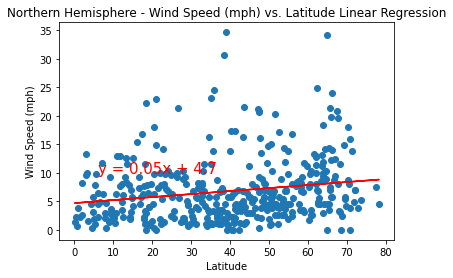

In [64]:
x_values = pd.to_numeric(northern['Latitude'])
y_values = pd.to_numeric(northern['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/North_Wind_vs_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23102625738602656


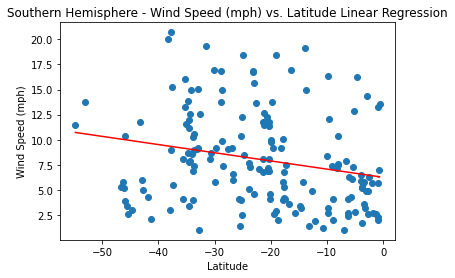

In [65]:
x_values = pd.to_numeric(southern['Latitude'])
y_values = pd.to_numeric(southern['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("./output_data/South_Wind_vs_Lat.png")